<a href="https://colab.research.google.com/github/Ayanlola2002/AISATURDAYLAGOS/blob/master/Neural_style_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NEURAL STYLE TRANSFER USING PYTORCH(GROUP 5 DEMOS)
GROUP MEMBERS 

*   IBRAHIM IGANA
*   SADIQ 
*   TOLA
*   TUNDE


**BackGround Of Study**

Neural Style Transfer (NST) refers to a class of software algorithms that manipulate digital images, or videos, to adopt the appearance or visual style of another image. NST algorithms are characterized by their use of deep neural networks in order to perform the image transformation. 
Common uses for NST are the creation of artificial artwork from photographs, for example by transferring the appearance of famous paintings to user supplied photographs. Several notable mobile apps use NST techniques for this purpose, including DeepArt and Prisma.(Wikipedia)


**Using CNN For Neural style Transfer**
Usually in a Convolutional Neural Network the maps in the lower layers look for low level features such as lines or blobs (gabor filters). As we go to the higher layers, out features become increasingly complex. Intuitively we can think of it this way- the lower layers capture low level features such as lines and blobs, the layer above that builds up on these low level features and calculates slightly more complex features, and so on.

Hence we can make a general conclusion that ConvNets develop a hierarchical representation of features.

"This property is the basis of style transfer" in convolutional neural network.

It should be strongly noted that while doing style transfer, we are not training a neural network. Rather, what we're doing is — we start from a blank image composed of random pixel values, and we optimize a cost function by changing the pixel values of the image. In simple terms, we start with a blank canvas and a cost function. Then we iteratively modify each pixel so as to minimize our cost function. To put it in another way, while training neural networks we update our weights and biases, but in style transfer, we keep the weights and biases constant, and instead, update our image.

Doing this, it is important that our cost function correctly represents problem. 
The cost function in neural style transfer has two terms- a style loss term and a content loss term, both show with the links below.



1.   https://drive.google.com/file/d/18nxJ02dfWqAKZhYPRR742LI-5p3JAI4I/view?usp=sharing
2.   https://drive.google.com/file/d/1nXOIBEKEXJIsXWenMyffAQuK1HadZfFx/view?usp=sharing



 Here, A^l is the representation of the original image and G^l is the representation of the generated image in layer l. Nl is the number of feature maps and Ml is the size of the flattened feature map in layer l. wl is the weight given to the style loss of layer l.

neural style involves capturing brush strokes and patterns. So we use the lower layers, which capture low level features. 

Also the use of Gram matrix cant be left out this is defined as  given a vector X  Gram matrix is X.X_transpose. The intuition behind using gram matrix is that we’re trying to capture the statistics of the lower layers.


 **Total Loss**
 
 The Total Loss in Neural Transfer is shown in the link below:
 
 https://drive.google.com/file/d/1vtUyx-JYC0IWStrE01XaJHPnw7hY5ozr/view?usp=sharing

where alpha and beta are weights for content and style, respectively. They can be tweaked to alter our final result.

 Total loss function basically represents our problem- we need the content of the final image to be similar to the content of the content image and the style of the final image should be similar to the style of the style image.

Now all we have to do is to minimize this loss. We minimize this loss by changing the input to the network itself. We basically start with a blank grey canvas and start altering the pixel values so as to minimize the loss. Any optimizer can be used to minimize this loss. Here, I’ve used  Adam and  obtained a fair  results on this task.


**References**


*   https://en.wikipedia.org/wiki/Neural_Style_Transfer
*   https://towardsdatascience.com/a-brief-introduction-to-neural-style-transfer-d05d0403901d
*   https://github.com/leongatys/PytorchNeuralStyleTransfer/blob/master/NeuralStyleTransfer.ipynb










In [0]:
# import resources
%matplotlib inline

from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.optim as optim
import requests
from torchvision import transforms, models

**Load in VGG19 (features)**
VGG19 is split into two portions:

1.    vgg19.features, which are all the convolutional and pooling layers
2.    vgg19.classifier,which are the three linear, classifier layers at the end

We only need the features portion, which we're going to load in and "freeze" the weights of, below.

In [4]:
# get the "features" portion of VGG19 (we will not need the "classifier" portion)
vgg = models.vgg19(pretrained=True).features

# freeze all VGG parameters since we're only optimizing the target image
for param in vgg.parameters():
    param.requires_grad_(False)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 574673361/574673361 [00:44<00:00, 12969251.55it/s]


In [5]:
# move the model to GPU, if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

(https://drive.google.com/file/d/1nXOIBEKEXJIsXWenMyffAQuK1HadZfFx/view?usp=sharing)

**Load in Content and Style Images** 

You can load in any images you want! Below, we've provided a helper function for loading in any type and size of image. The load_image function also converts images to normalized Tensors.

Additionally, it will be easier to have smaller images and to squish the content and style images so that they are of the same size.

In [0]:
def load_image(img_path, max_size=400, shape=None):
    ''' Load in and transform an image, making sure the image
       is <= 400 pixels in the x-y dims.'''
    if "http" in img_path:
        response = requests.get(img_path)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(img_path).convert('RGB')
    
    # large images will slow down processing
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    
    if shape is not None:
        size = shape
        
    in_transform = transforms.Compose([
                        transforms.Resize(size),
                        transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), 
                                             (0.229, 0.224, 0.225))])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    
    return image

In [0]:
# load in content and style image
content = load_image('mypic.jpg').to(device)
# Resize style to match content, makes code easier
style = load_image('hockney.jpg', shape=content.shape[-2:]).to(device)


In [0]:
# helper function for un-normalizing an image 
# and converting it from a Tensor image to a NumPy image for display
def im_convert(tensor):
    """ Display a tensor as an image. """
    
    image = tensor.to("cpu").clone().detach()
    image = image.numpy().squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)

    return image

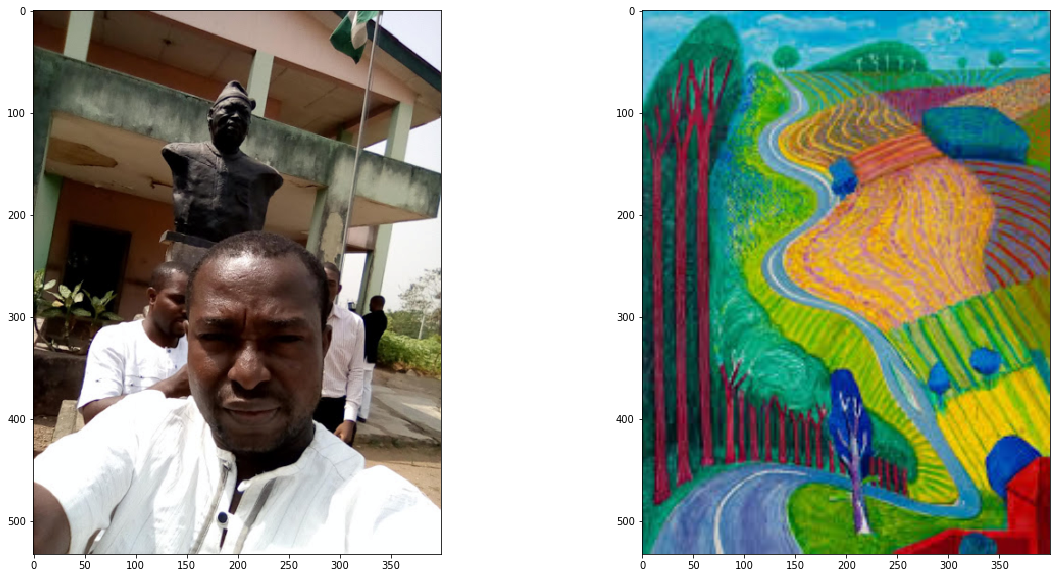

In [9]:
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# content and style ims side-by-side
ax1.imshow(im_convert(content))
ax2.imshow(im_convert(style))

**Content and Style Features** 

Below, complete the mapping of layer names to the names found in the paper for the content representation and the style representation.

In [0]:
def get_features(image, model, layers=None):
    """ Run an image forward through a model and get the features for 
        a set of layers. Default layers are for VGGNet matching Gatys et al (2016)
    """
    
    ## TODO: Complete mapping layer names of PyTorch's VGGNet to names from the paper
    ## Need the layers for the content and style representations of an image
    if layers is None:
        layers = {'0': 'conv1_1',
                  '5': 'conv2_1', 
                  '10': 'conv3_1', 
                  '19': 'conv4_1',
                  '21': 'conv4_2',  ## content representation
                  '28': 'conv5_1'}
        
    features = {}
    x = image
    # model._modules is a dictionary holding each module in the model
    for name, layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x
            
    return features


**Gram  Matrix**
The output of every convolutional layer is a Tensor with dimensions associated with the batch_size, a depth, d and some height and width (h, w). The Gram matrix of a convolutional layer can be calculated as follows:

1.   Get the depth, height, and width of a tensor using batch_size, d, h, w = tensor.size
2.   Reshape that tensor so that the spatial dimensions are flattened
3.   Calculate the gram matrix by multiplying the reshaped tensor by it's transpose

Note: You can multiply two matrices using torch.mm(matrix1, matrix2).

In [0]:
def gram_matrix(tensor):
    """ Calculate the Gram Matrix of a given tensor 
        Gram Matrix: https://en.wikipedia.org/wiki/Gramian_matrix
    """
    
    # get the batch_size, depth, height, and width of the Tensor
    _, d, h, w = tensor.size()
    
    # reshape so we're multiplying the features for each channel
    tensor = tensor.view(d, h * w)
    
    # calculate the gram matrix
    gram = torch.mm(tensor, tensor.t())
    
    return gram

 **Putting it all**
Now that we've written functions for extracting features and computing the gram matrix of a given convolutional layer; let's put all these pieces together! We'll extract our features from our images and calculate the gram matrices for each layer in our style representation.



In [0]:

# get content and style features only once before training
content_features = get_features(content, vgg)
style_features = get_features(style, vgg)

# calculate the gram matrices for each layer of our style representation
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

# create a third "target" image and prep it for change
# it is a good idea to start off with the target as a copy of our *content* image
# then iteratively change its style
target = content.clone().requires_grad_(True).to(device)

**Loss and Weights**
**Individual Layer Style **

Below, you are given the option to weight the style representation at each relevant layer. It's suggested that you use a range between 0-1 to weight these layers. By weighting earlier layers (conv1_1 and conv2_1) more, you can expect to get larger style artifacts in your resulting, target image. Should you choose to weight later layers, you'll get more emphasis on smaller features. This is because each layer is a different size and together they create a multi-scale style representation!

In [0]:
# weights for each style layer 
# weighting earlier layers more will result in *larger* style artifacts
# notice we are excluding `conv4_2` our content representation
style_weights = {'conv1_1': 1.,
                 'conv2_1': 0.75,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}

content_weight = 1  # alpha
style_weight = 1e6  # beta

 **Updating the Target & Calculating**
You'll decide on a number of steps for which to update your image, this is similar to the training loop that you've seen before, only we are changing our target image and nothing else about VGG19 or any other image. Therefore, the number of steps is really up to you to set! I recommend using at least 2000 steps for good results. But, you may want to start out with fewer steps if you are just testing out different weight values or experimenting with different images.

Inside the iteration loop, you'll calculate the content and style losses and update your target image, accordingly.

**Content **

The content loss will be the mean squared difference between the target and content features at layer conv4_2. This can be calculated as follows:

content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)

**Style  Loss**

The style loss is calculated in a similar way, only you have to iterate through a number of layers, specified by name in our dictionary  style_weights.

You'll calculate the gram matrix for the target image, target_gram and style image style_gram at each of these layers and compare those gram matrices, calculating the layer_style_loss. Later, you'll see that this value is normalized by the size of the layer.

 **Total Loss**
Finally, you'll create the total loss by adding up the style and content losses and weighting them with your specified alpha and beta!

Intermittently, we'll print out this loss; don't be alarmed if the loss is very large. It takes some time for an image's style to change and you should focus on the appearance of your target image rather than any loss value. Still, you should see that this loss decreases over some number of iterations.

Total loss:  107410864.0


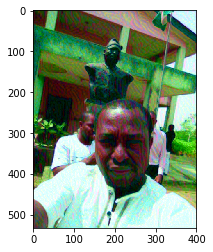

Total loss:  22825056.0


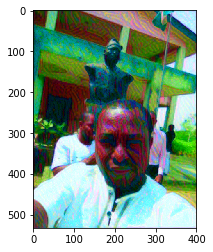

Total loss:  11833612.0


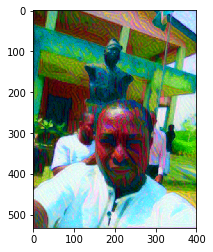

Total loss:  7472688.5


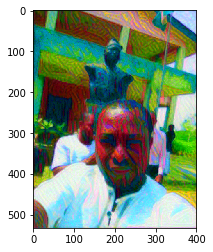

Total loss:  5107088.0


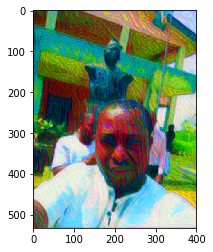

In [14]:
# for displaying the target image, intermittently
show_every = 400

# iteration hyperparameters
optimizer = optim.Adam([target], lr=0.003)
steps = 2000  # decide how many iterations to update your image (5000)

for ii in range(1, steps+1):
    
    # get the features from your target image
    target_features = get_features(target, vgg)
    
    # the content loss
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
    
    # the style loss
    # initialize the style loss to 0
    style_loss = 0
    # then add to it for each layer's gram matrix loss
    for layer in style_weights:
        # get the "target" style representation for the layer
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        _, d, h, w = target_feature.shape
        # get the "style" style representation
        style_gram = style_grams[layer]
        # the style loss for one layer, weighted appropriately
        layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
        # add to the style loss
        style_loss += layer_style_loss / (d * h * w)
        
    # calculate the *total* loss
    total_loss = content_weight * content_loss + style_weight * style_loss
    
    # update your target image
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    # display intermediate images and print the loss
    if  ii % show_every == 0:
        print('Total loss: ', total_loss.item())
        plt.imshow(im_convert(target))
        plt.show()


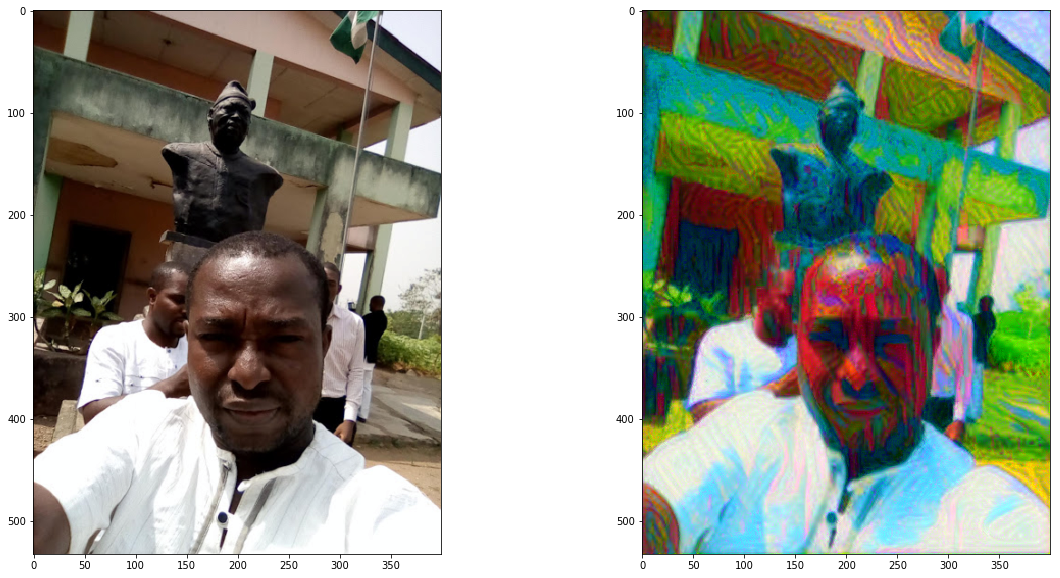

In [15]:

# display content and final, target image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(im_convert(content))
ax2.imshow(im_convert(target))